In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para a visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# Carregar os dados
file_path = "/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv"
data = pd.read_csv(file_path)

# Configurar estilo do seaborn
sns.set(style="whitegrid")

# Listar todas as colunas do DataFrame
# print("Colunas Originais:")
# print(data.columns.tolist())

# Contar o número de colunas
# num_colunas = len(data.columns)
# print(f"Total de colunas: {num_colunas}")

# Dados Gerais

In [96]:
# Total de respondentes
total_respondentes = data.shape[0]
print(f"Total de respondentes: {total_respondentes}")

Total de respondentes: 5293


Soma das porcentagens: 100.00%


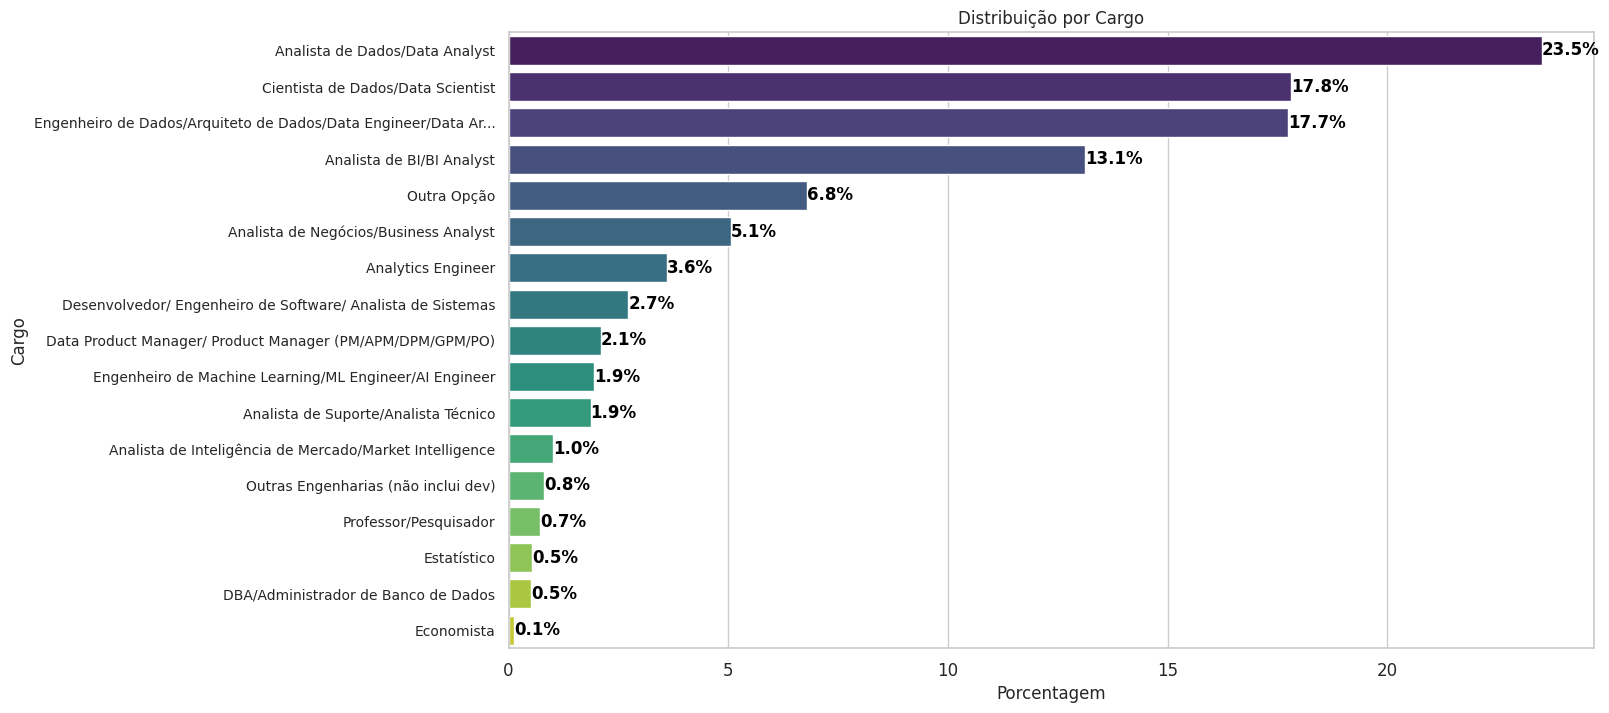

In [97]:
# Verificar se a coluna 'Cargo Atual' está no DataFrame
if "('P2_f ', 'Cargo Atual')" in data.columns:
    # Distribuição dos cargos
    distrib_cargo = data["('P2_f ', 'Cargo Atual')"].value_counts()

    # Calcular porcentagens
    total = distrib_cargo.sum()
    percentages = distrib_cargo / total * 100

    # Verificar se as porcentagens somam 100%
    sum_percentages = percentages.sum()
    print(f"Soma das porcentagens: {sum_percentages:.2f}%")

    # Truncar o texto das respostas se for muito longo
    truncated_labels = [label[:60] + '...' if len(label) > 60 else label for label in distrib_cargo.index]

    # Visualizar a distribuição dos cargos
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x=percentages.values, y=distrib_cargo.index.to_numpy(), palette="viridis")
    
    # Adicionar rótulos nos valores das barras
    for p, percentage in zip(ax.patches, percentages):
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(f'{percentage:.1f}%', (x, y), ha='left', va='center', fontsize=12, fontweight='bold', color='black')

    plt.title("Distribuição por Cargo")
    plt.xlabel("Porcentagem")
    plt.ylabel("Cargo")
    plt.xticks(fontsize=12)
    plt.yticks(ticks=range(len(truncated_labels)), labels=truncated_labels, fontsize=10)  # Ajustar tamanho da fonte para melhor legibilidade
    plt.show()
else:
    print("A coluna 'Cargo Atual' não foi encontrada no DataFrame.")

# Análise de IA

Soma das porcentagens (verificação): 100.00%


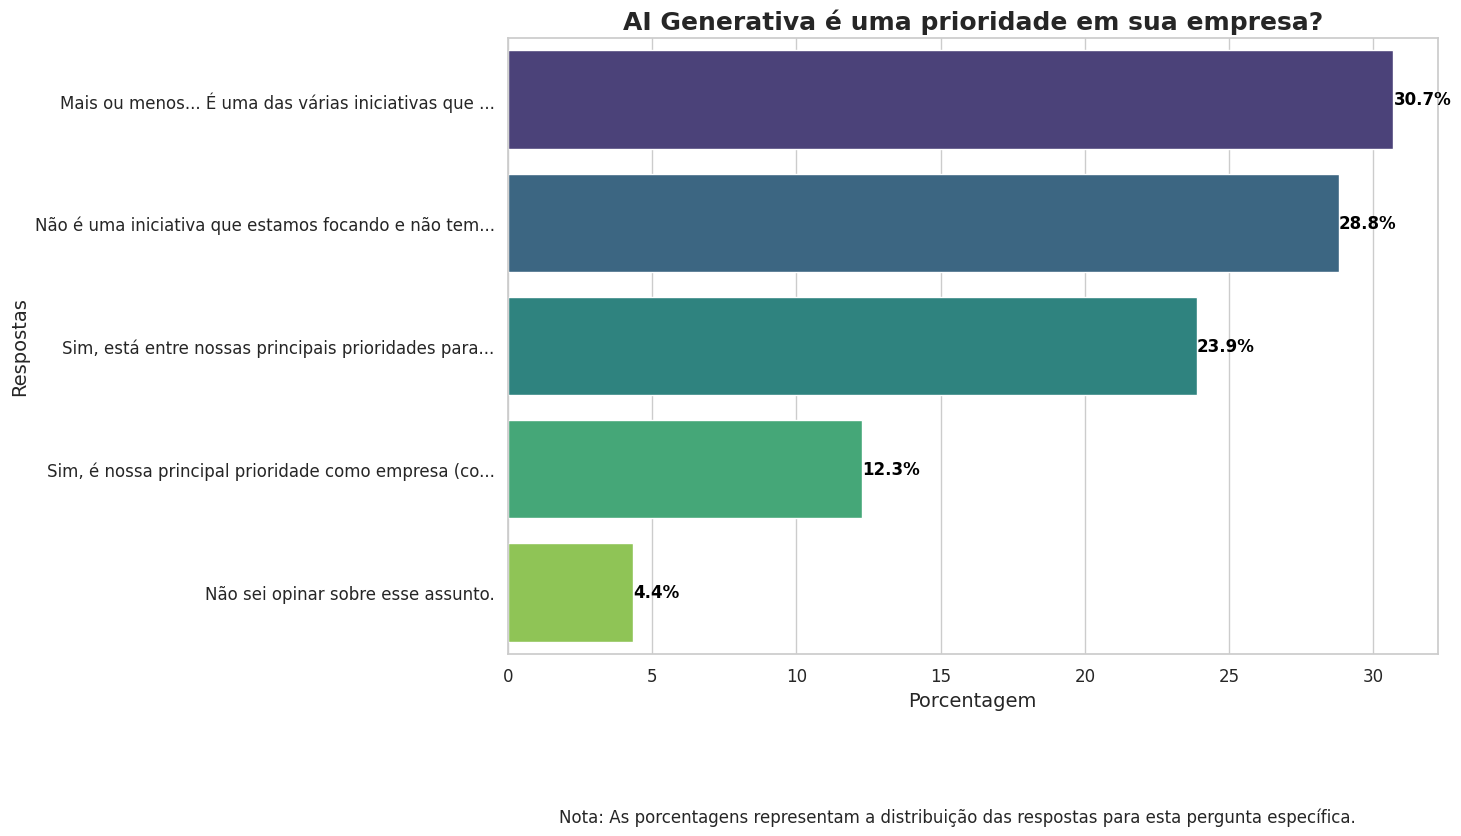

In [124]:
# Nome completo da coluna
column = "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')"

# Função para plotar gráfico individual com porcentagem e legendas truncadas
def plot_individual_analysis(data, column, title, xlabel='Porcentagem', ylabel='Respostas'):
    plt.figure(figsize=(12, 8))
    response_counts = data[column].value_counts()
    truncated_labels = [label[:50] + '...' if len(label) > 50 else label for label in response_counts.index]
    
    # Calcular porcentagens
    total = response_counts.sum()
    percentages = response_counts / total * 100
    
    # Verificar a soma das porcentagens
    sum_percentages = percentages.sum()
    print(f"Soma das porcentagens (verificação): {sum_percentages:.2f}%")
    
    ax = sns.barplot(x=percentages.values, y=response_counts.index.to_numpy(), palette='viridis')
    
    for p, percentage in zip(ax.patches, percentages):
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(f'{percentage:.1f}%', (x, y), ha='left', va='center', fontsize=12, fontweight='bold', color='black')
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(ticks=range(len(truncated_labels)), labels=truncated_labels, fontsize=12)  # Reduzir tamanho do texto das legendas
    
    # Adicionar explicação
    plt.figtext(0.5, -0.1, 'Nota: As porcentagens representam a distribuição das respostas para esta pergunta específica.', ha='center', fontsize=12)
        
    plt.show()

# Análise individual para a pergunta sobre AI Generativa
plot_individual_analysis(data, column, 'AI Generativa é uma prioridade em sua empresa?', ylabel='Respostas')


Soma das porcentagens (verificação): 100.00%


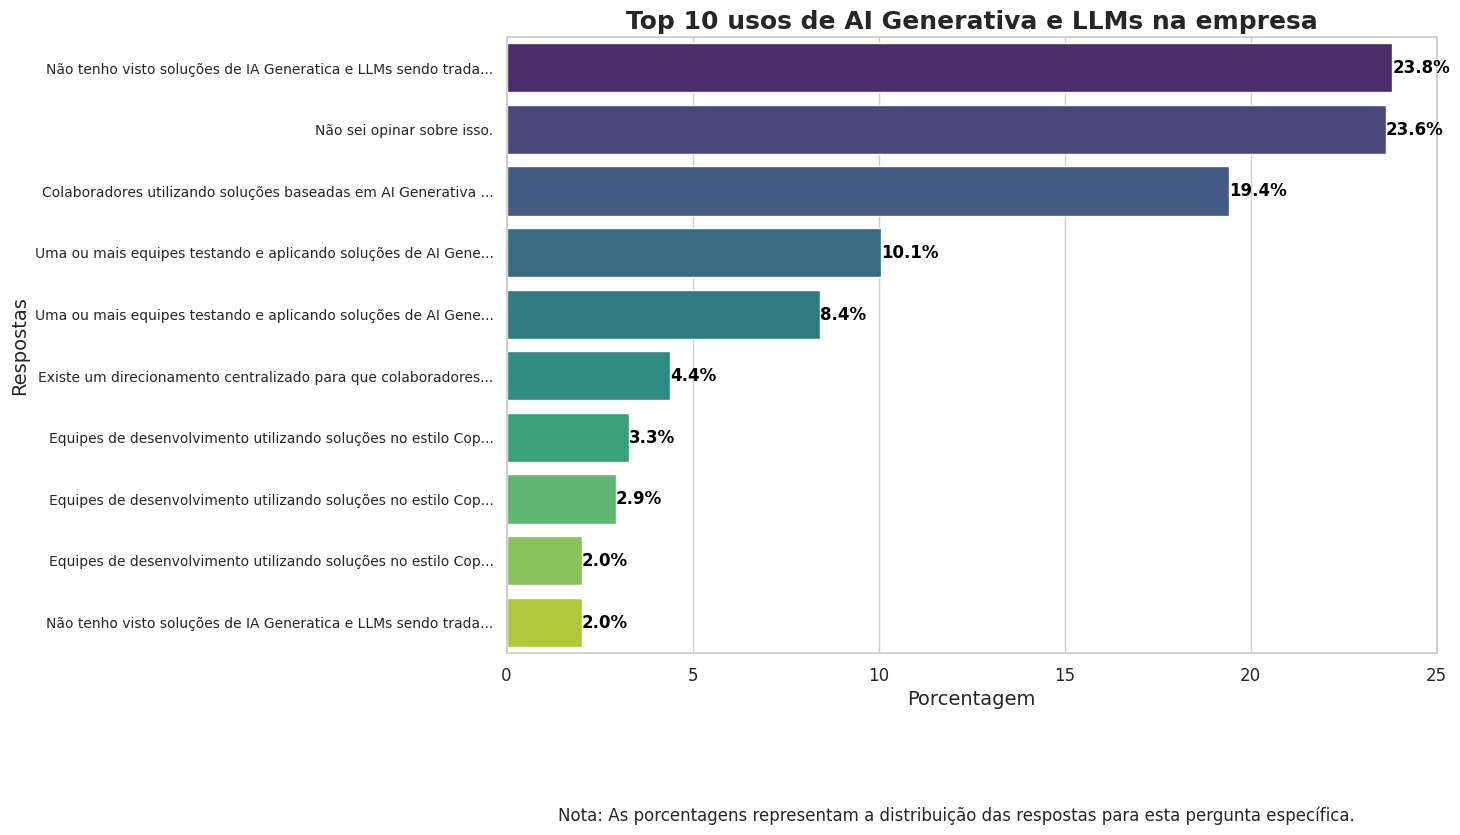

In [123]:
# Nome completo da coluna
column = "('P3_f ', 'Tipos de uso de AI Generativa e LLMs na empresa')"

# Filtrar os dados para contar as respostas
response_counts = data[column].value_counts().nlargest(10)  # Obter os 10 maiores valores

# Calcular porcentagens
total_responses = response_counts.sum()
percentages = response_counts / total_responses * 100

# Verificar a soma das porcentagens
sum_percentages = percentages.sum()
print(f"Soma das porcentagens (verificação): {sum_percentages:.2f}%")

# Truncar o texto das respostas se for muito longo
truncated_labels = [label[:60] + '...' if len(label) > 60 else label for label in response_counts.index]

# Função para plotar gráfico simples com porcentagens e respostas truncadas
def plot_simple_analysis(response_counts, percentages, truncated_labels, title, xlabel='Porcentagem', ylabel='Respostas'):
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=percentages.values, y=response_counts.index.to_numpy(), palette='viridis')
    
    for p, percentage in zip(ax.patches, percentages):
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(f'{percentage:.1f}%', (x, y), ha='left', va='center', fontsize=12, fontweight='bold', color='black')
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(ticks=range(len(truncated_labels)), labels=truncated_labels, fontsize=10)  # Reduzir tamanho do texto das legendas
        
    # Adicionar explicação
    plt.figtext(0.5, -0.1, 'Nota: As porcentagens representam a distribuição das respostas para esta pergunta específica.', ha='center', fontsize=12)
    
    plt.show()

# Análise individual para a pergunta sobre Tipos de uso de AI Generativa
plot_simple_analysis(response_counts, percentages, truncated_labels, 'Top 10 usos de AI Generativa e LLMs na empresa', ylabel='Respostas')


Soma das porcentagens (verificação): 100.00%


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


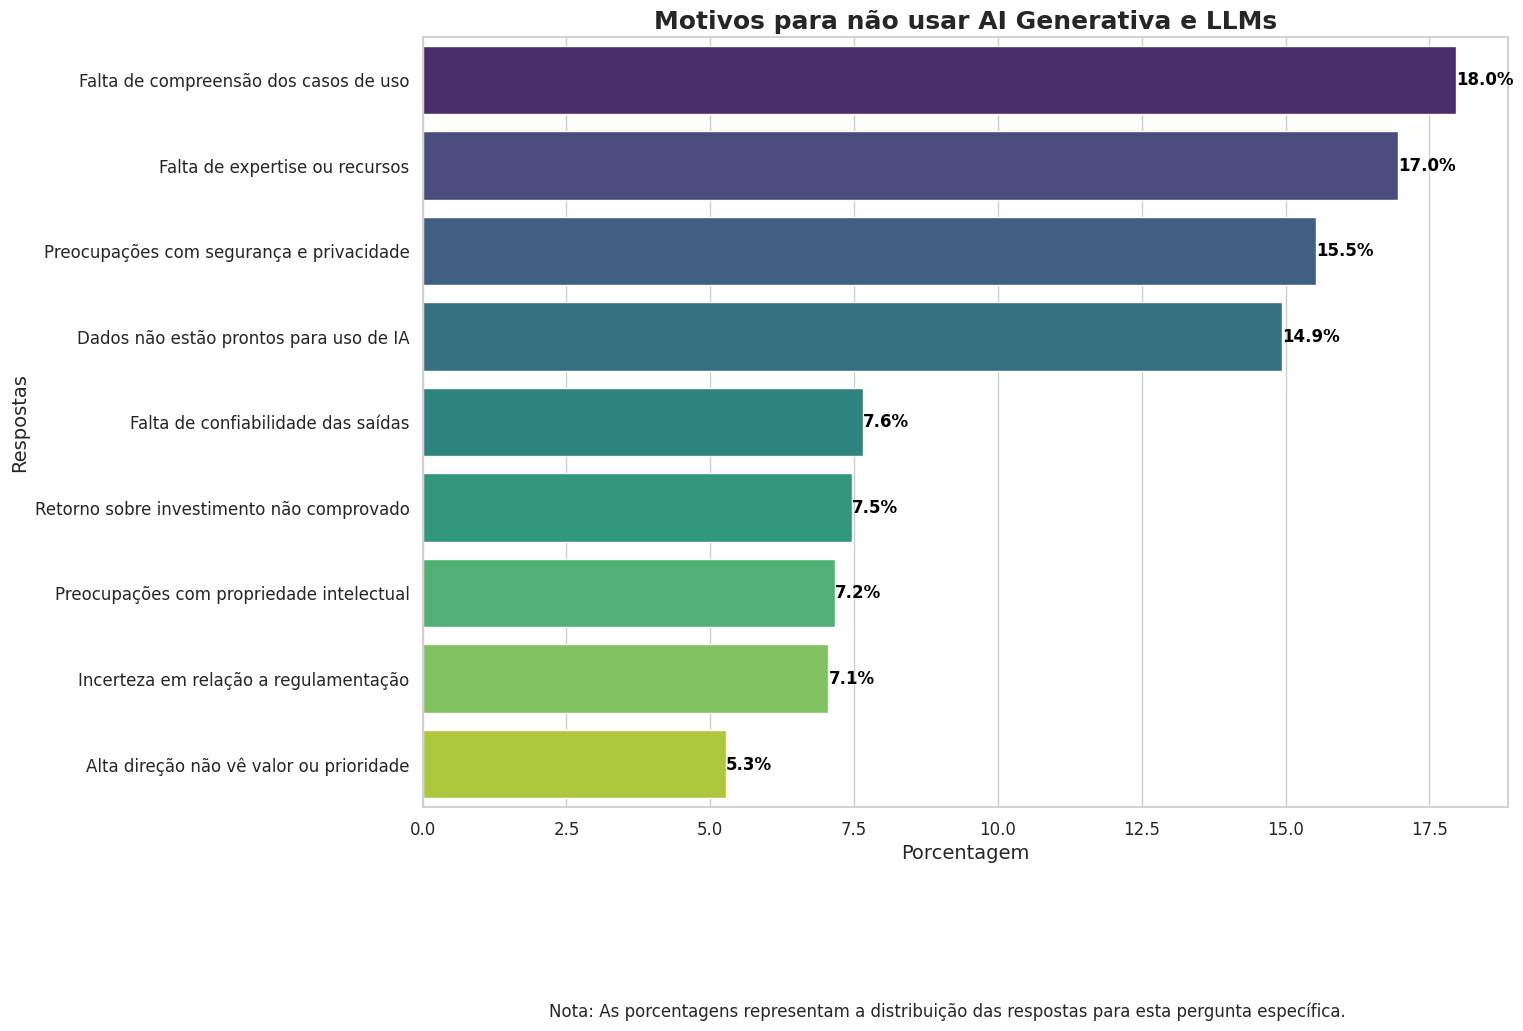

In [117]:
# Nome completo das colunas relacionadas aos motivos para não usar IA Generativa
columns = [
    "('P3_g_1 ', 'Falta de compreensão dos casos de uso')",
    "('P3_g_2 ', 'Falta de confiabilidade das saídas (alucinação dos modelos)')",
    "('P3_g_3 ', 'Incerteza em relação a regulamentação')",
    "('P3_g_4 ', 'Preocupações com segurança e privacidade de dados')",
    "('P3_g_5 ', 'Retorno sobre investimento (ROI) não comprovado de IA Generativa')",
    "('P3_g_6 ', 'Dados da empresa não estão prontos para uso de IA Generativa')",
    "('P3_g_7 ', 'Falta de expertise ou falta de recursos')",
    "('P3_g_8 ', 'Alta direção da empresa não vê valor ou não vê como prioridade')",
    "('P3_g_9 ', 'Preocupações com propriedade intelectual')"
]

# Contar quantas vezes cada motivo foi selecionado
response_counts = data[columns].apply(lambda x: x == 1).sum()

# Calcular porcentagens baseadas no total de respostas para essa pergunta
total_responses = response_counts.sum()
percentages = response_counts / total_responses * 100

# Verificar a soma das porcentagens
sum_percentages = percentages.sum()
print(f"Soma das porcentagens (verificação): {sum_percentages:.2f}%")

# Definir rótulos truncados para melhor legibilidade
labels = [
    "Falta de compreensão dos casos de uso",
    "Falta de confiabilidade das saídas",
    "Incerteza em relação a regulamentação",
    "Preocupações com segurança e privacidade",
    "Retorno sobre investimento não comprovado",
    "Dados não estão prontos para uso de IA",
    "Falta de expertise ou recursos",
    "Alta direção não vê valor ou prioridade",
    "Preocupações com propriedade intelectual"
]

# Ordenar os dados em ordem decrescente
sorted_indices = percentages.sort_values(ascending=False).index
percentages = percentages[sorted_indices]
labels = [labels[columns.index(i)] for i in sorted_indices]

# Função para plotar gráfico simples com porcentagens e respostas truncadas
def plot_simple_analysis(percentages, labels, title, xlabel='Porcentagem', ylabel='Respostas'):
    plt.figure(figsize=(14, 10))
    ax = sns.barplot(x=percentages.values, y=labels, palette='viridis')
    
    for p, percentage in zip(ax.patches, percentages):
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(f'{percentage:.1f}%', (x, y), ha='left', va='center', fontsize=12, fontweight='bold', color='black')
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)  # Ajustar tamanho da fonte para melhor legibilidade
    
    # Adicionar explicação
    plt.figtext(0.5, -0.1, 'Nota: As porcentagens representam a distribuição das respostas para esta pergunta específica.', ha='center', fontsize=12)
    
    plt.show()

# Análise individual para a pergunta sobre motivos para não usar AI Generativa
plot_simple_analysis(percentages, labels, 'Motivos para não usar AI Generativa e LLMs', ylabel='Respostas')


Soma das porcentagens (verificação): 100.00%


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


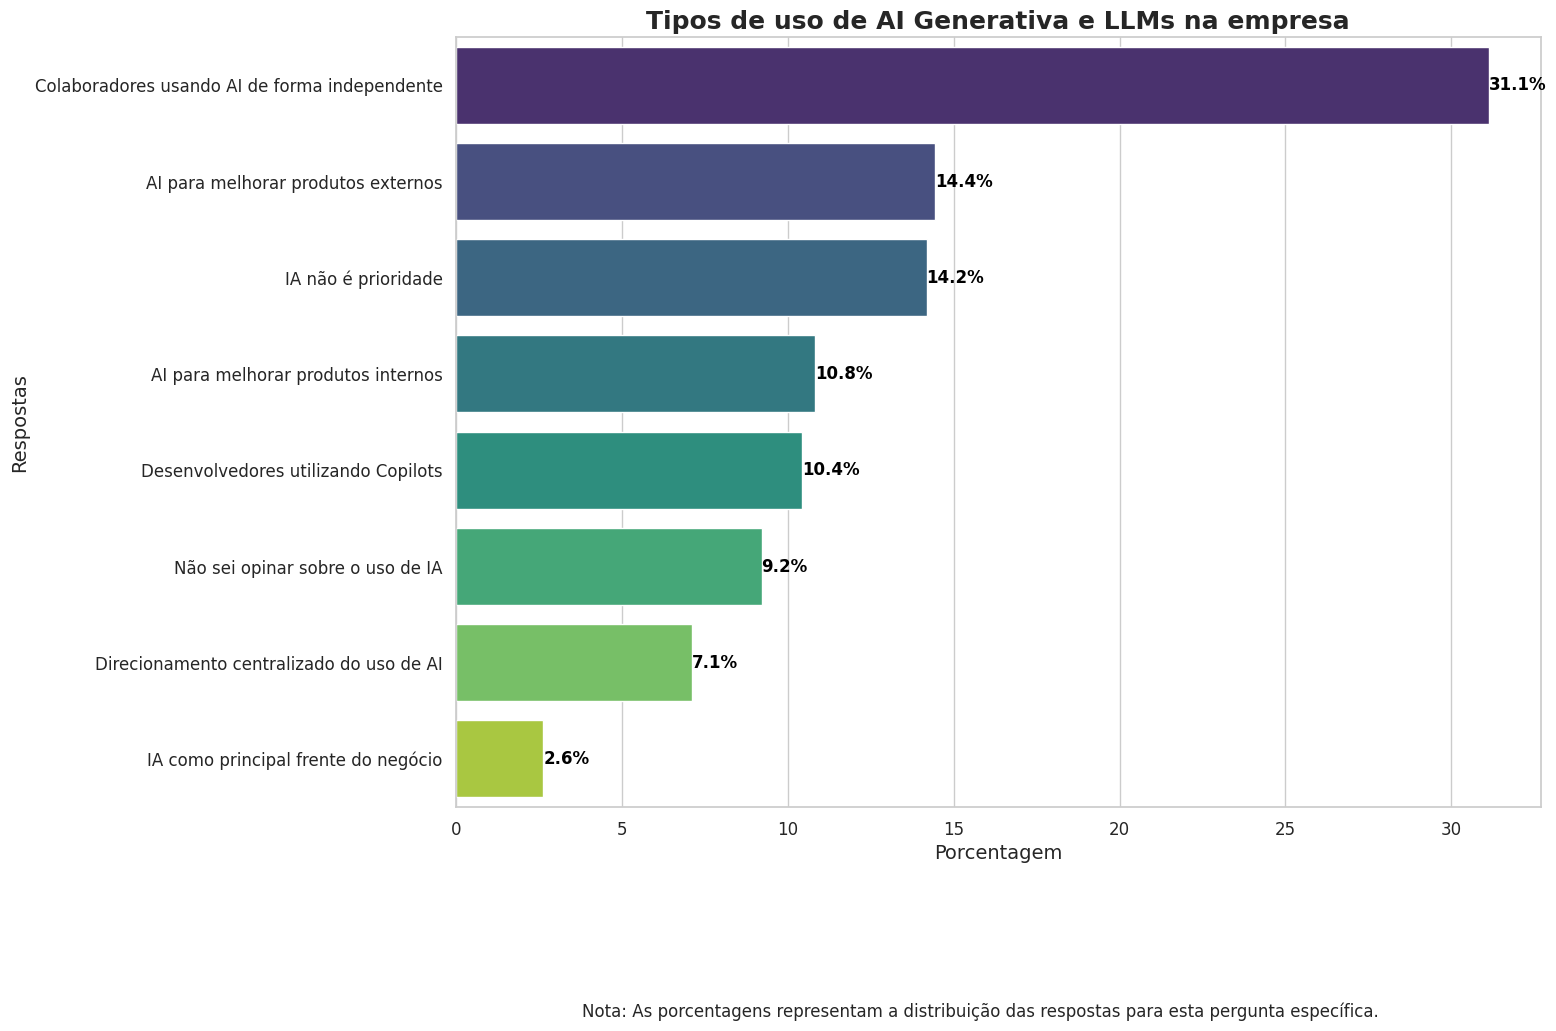

In [113]:
# Nome completo das colunas relacionadas aos tipos de uso de AI Generativa
columns = [
    "('P4_l_1 ', 'Colaboradores usando AI generativa de forma independente e descentralizada')",
    "('P4_l_2 ', 'Direcionamento centralizado do uso de AI generativa')",
    "('P4_l_3 ', 'Desenvolvedores utilizando Copilots')",
    "('P4_l_4 ', 'AI Generativa e LLMs para melhorar produtos externos para os clientes finais')",
    "('P4_l_5 ', 'AI Generativa e LLMs para melhorar produtos internos para os colaboradores')",
    "('P4_l_6 ', 'IA Generativa e LLMs como principal frente do negócio')",
    "('P4_l_7 ', 'IA Generativa e LLMs não é prioridade')",
    "('P4_l_8 ', 'Não sei opinar sobre o uso de IA Generativa e LLMs na empresa')"
]

# Contar quantas vezes cada tipo de uso foi selecionado
response_counts = data[columns].apply(lambda x: x == 1).sum()

# Calcular porcentagens baseadas no total de respostas para essa pergunta
total_responses = response_counts.sum()
percentages = response_counts / total_responses * 100

# Verificar a soma das porcentagens
sum_percentages = percentages.sum()
print(f"Soma das porcentagens (verificação): {sum_percentages:.2f}%")

# Definir rótulos truncados para melhor legibilidade
labels = [
    "Colaboradores usando AI de forma independente",
    "Direcionamento centralizado do uso de AI",
    "Desenvolvedores utilizando Copilots",
    "AI para melhorar produtos externos",
    "AI para melhorar produtos internos",
    "IA como principal frente do negócio",
    "IA não é prioridade",
    "Não sei opinar sobre o uso de IA"
]

# Ordenar os dados em ordem decrescente
sorted_indices = percentages.sort_values(ascending=False).index
percentages = percentages[sorted_indices]
labels = [labels[columns.index(i)] for i in sorted_indices]

# Função para plotar gráfico simples com porcentagens e respostas truncadas
def plot_simple_analysis(percentages, labels, title, xlabel='Porcentagem', ylabel='Respostas'):
    plt.figure(figsize=(14, 10))
    ax = sns.barplot(x=percentages.values, y=labels, palette='viridis')
    
    for p, percentage in zip(ax.patches, percentages):
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(f'{percentage:.1f}%', (x, y), ha='left', va='center', fontsize=12, fontweight='bold', color='black')
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)  # Ajustar tamanho da fonte para melhor legibilidade
    
    # Adicionar explicação
    plt.figtext(0.5, -0.1, 'Nota: As porcentagens representam a distribuição das respostas para esta pergunta específica.', ha='center', fontsize=12)
    
    plt.show()

# Análise individual para a pergunta sobre tipos de uso de AI Generativa
plot_simple_analysis(percentages, labels, 'Tipos de uso de AI Generativa e LLMs na empresa', ylabel='Respostas')